# Introduction

### Choosing this metric

For my metric, I chose to the best neighborhood based on how many COVID-19 cases that neighborhood has recorded in the past month. In other words, the "best" neighborhood would have the least number of COVID-19 cases.

The particular dataset I imported updated its COVID cases monthly, so I made sure to keep up to date with the correct data.

I think this metric is very insightful as to the safety of each neighborhood/municipality throughout Pittsburgh because it is relevant to all of us today, since the COVID outbreak occured relatively recently. In addition, many people who are looking for homes think of safety as their number one priority, so residing in a neighborhood that is relatively safe is important to many homeowners and people.

When searching through the datasets, I wanted to find a dataset that was relevant and pertained to many, if not all of us today. So, I actively searched for a dataset related to COVID-19 cases in the Pittsburgh Area. Eventually I came across a dataset that satisfied me, but there was one immediate issue upon opening it. Instead of by sectioning the different areas of Pittsburgh off by neighborhood, this dataset recorded COVID cases across the state of Pennsylvania by county. Although this information could be useful, it was not the dataset I was looking for. So, I found the next COVID-related dataset available on WPRDC, and found one that was more helpful. Now, this dataset sectioned the different areas of Pittsburgh off by neighborhoods, AND municipalities. Naturally, I consulted Google to see what the difference between neighborhood and municipality was. No matter how much I searched, I struggled to find the difference. So, I conducted my analysis with the assumption that neighborhood and municipalities were similar enough to the extent where I could utilize both.

## Importation

In [10]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gp
#initializing pandas, numpy, matplotlib, and geopandas


#Doing best neighborhoods based on least number of Covid cases by neighborhood
#fewest cases


cases = pd.read_csv("covid-19.csv")

cases

,neighborhood_municipality,individuals_tested,cases,deaths,hospitalizations,tests,postives,ag_tests,positive_ag_tests,pcr_tests,positive_pcr_tests,update_date
0,Aleppo,929,161,11,14,3909,202,2172,71,1739,131,2021-11-15
1,Allegheny Center (Pittsburgh),790,136,6,7,1767,163,247,20,1521,143,2021-11-15
2,Allegheny West (Pittsburgh),304,40,0,2,803,45,144,8,659,37,2021-11-15
3,Allentown (Pittsburgh),1151,247,1,26,3451,289,806,44,2643,245,2021-11-15
4,Arlington (Pittsburgh),873,206,5,16,3014,242,694,65,2316,177,2021-11-15
...,...,...,...,...,...,...,...,...,...,...,...,...
216,Whitehall,8649,2016,61,144,27849,2391,5439,712,22393,1666,2021-11-15
217,Wilkins,3444,673,12,55,9925,767,2203,214,7726,547,2021-11-15
218,Wilkinsburg,8561,1494,38,200,26645,1720,4523,271,22121,1446,2021-11-15
219,Wilmerding,873,207,1,15,2504,227,575,60,1931,167,2021-11-15


In [9]:
sorted_cases = cases["cases"].sort_values(ascending = True)

TopCases = sorted_cases.iloc[:10]
topcase = []
topcase.append(TopCases)

TopCases

199     4
91      5
195     6
41     10
5      16
185    21
175    22
163    25
68     25
208    28
Name: cases, dtype: int64


The first column of numbers correlate with the order in which the neighborhood/municipalities are presented on the csv file. The second column indicates the number of cases associated with each neighborhood/municipality within the dataset. The output above showcases the 10 neighborhoods/municipalities with the least number of COVID cases.

In [13]:
#Doing best neighborhoods based on least number of COVID related deaths by neighborhood
#fewest deaths
sorted_deaths = cases["deaths"].sort_values(ascending = True)

Top_Ten_Deaths = sorted_deaths.iloc[:10]
Top_half_Deaths = sorted_deaths.iloc[:111]
topDeath = []
topDeath.append(Top_half_Deaths)

Top_half_Deaths

190    0
68     0
154    0
26     0
62     0
      ..
37     4
48     4
134    4
170    4
55     4
Name: deaths, Length: 111, dtype: int64

Even when observing the 111 neighborhoods with the lowest deaths related to COVID-19, the deaths reach 4. This is an indicator that at least half of the neighborhoods in the data set had COVID deaths in the past month spanning from 0-4 deaths, since there are 221 neighborhoods in total within the dataset.
We will see later on that safest neighborhood by deaths is not a great metric.

## Average Number of Cases per Neighborhood/Municipality

In [3]:
#Average Cases per Neighborhoods across Pittsburgh
total_cases = cases["cases"].sum()
avg_cases = total_cases/cases["neighborhood_municipality"].count()
print(avg_cases)

622.7692307692307


# Graphics

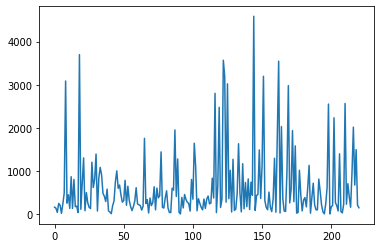

In [32]:
cases["cases"].plot()

### Safest Municipalities by COVID-19 Cases

Text(0, 0.5, 'Number of Cases')

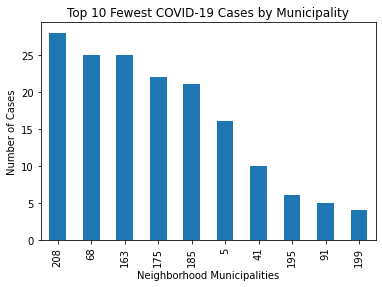

In [24]:
cases["cases"].sort_values(ascending = False).tail(10).plot.bar(x = "neighborhood_municipality",y = "cases", rot = 90)
#The number of COVID Cases on the y-axis, related to the number associated with each neighborhood (x-axis).
plt.title("Top 10 Fewest COVID-19 Cases by Municipality")
plt.xlabel("Neighborhood Municipalities")
plt.ylabel("Number of Cases")

This graphical representation of the top 10 safest neighborhoods/municipalities by number of cases is not very pleasing to look at, specifically the X-axis being the index of the neighborhoods/municipalities rather than the name of the neighborhoods/municipalities themselves.

So, I went through and looked up each of the 10 indices provided in the graphic above in the data file and manually entered the x-axis of the bar graph shown below, along with the exact number of cases associated with each neighborhood/municipality. This is not the most efficient method.

Text(0, 0.5, 'Number of Cases')

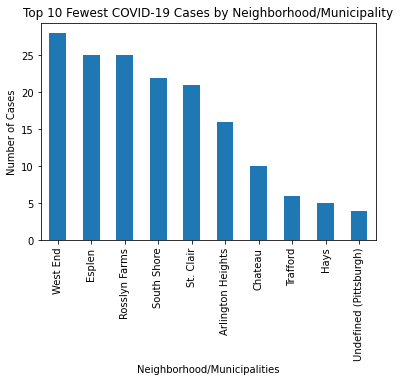

In [17]:
pd.Series([28, 25, 25, 22,21,16,10,6, 5, 4]   #Manually entered these values using the dataset
          , index=["West End", "Esplen","Rosslyn Farms","South Shore","St. Clair",
                   "Arlington Heights", "Chateau","Trafford","Hays","Undefined (Pittsburgh)"]).plot.bar() #Manually entered names using the dataset
plt.title("Top 10 Fewest COVID-19 Cases by Neighborhood/Municipality")
plt.xlabel("Neighborhood/Municipalities")
plt.ylabel("Number of Cases")

Here, we can observe that each of the top 10 safest neighborhoods/municipalities by number of COVID-19 cases barely reaches 30. However, the Undefined areas of Pittsburgh, or communities that do not belong to a particular neighborhood/municipality, have the fewest cases. Because we don't exactly know where "undefined" is, we must rule it out and resort to looking at the next safest neighborhood by COVID-cases, which is Hays. Hays boasts having only 5 cases in the past month. While it is close between Trafford and Hays, with 6 cases and 5 cases on record respectively, Hays takes the cake in having the fewest number of cases.

### Safest Municipalities by COVID-19-related Deaths

Text(0, 0.5, 'Amount of Deaths')

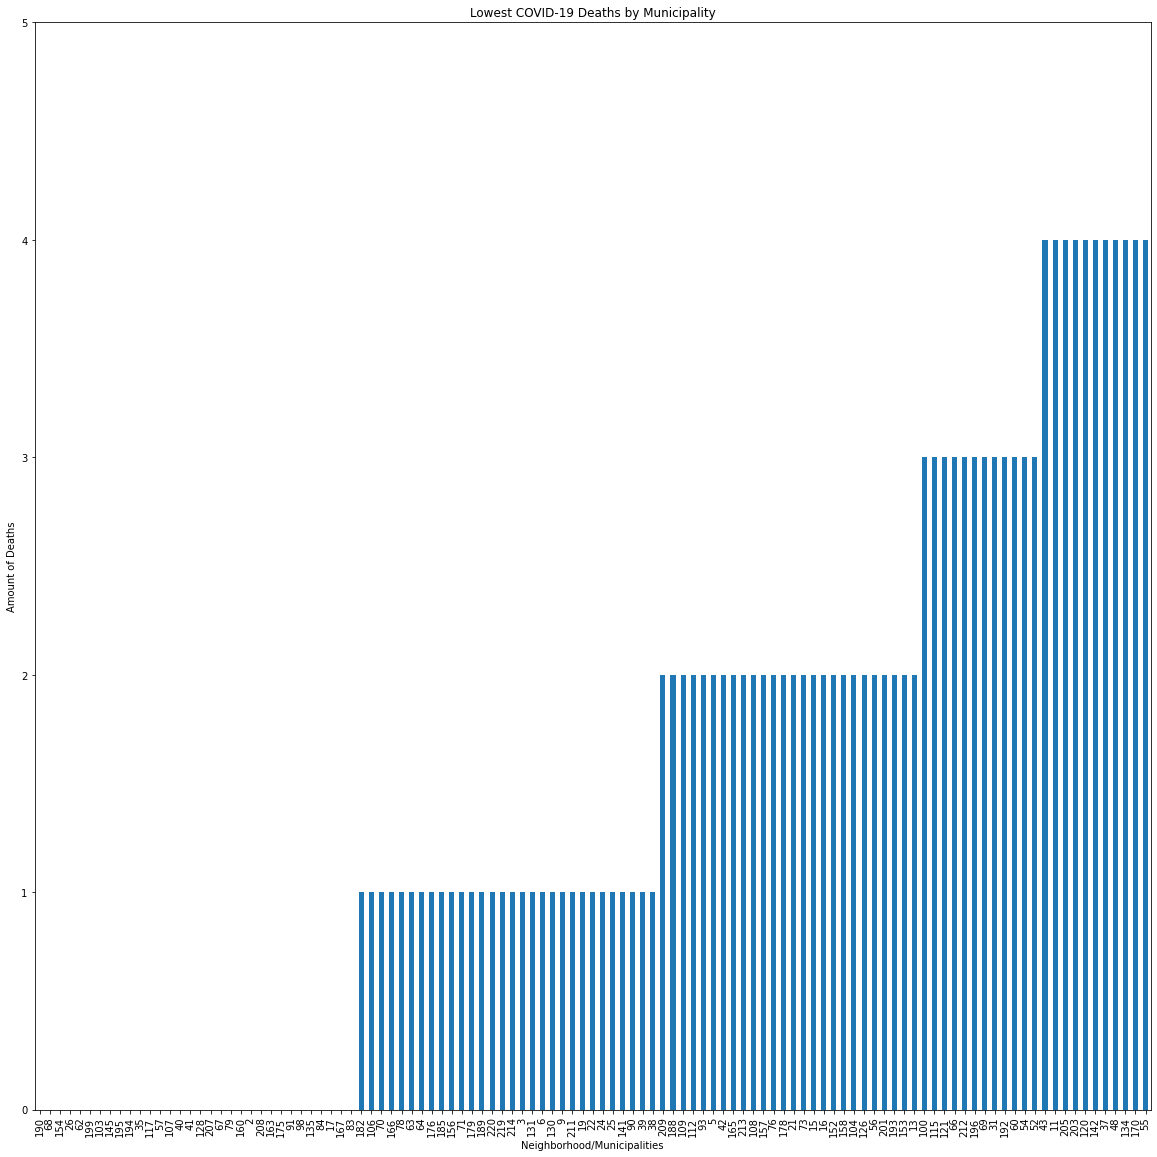

In [16]:
Top_half_Deaths.plot(kind = "bar", ylim = [0, 5], figsize = (20,20))
#This graph represents the Top 100 deaths, sorted by least to highest number of deaths related to COVID.
plt.title("Lowest COVID-19 Deaths by Municipality")
plt.xlabel("Neighborhood/Municipalities")
plt.ylabel("Amount of Deaths")

As seen here, there is a tie between the top 10 safest neighborhoods/municipalities by COVID-19 deaths. Unfortunately, this submetric will not be a helpful way in portraying the safest neighborhoods/municipalities, at least for this dataset. In addition, this graph is not very pleasing to look at, even when enlarged.

### Heatmap of COVID-19 Cases in Pittsburgh Neighborhoods/Municipalities

In [5]:
num_cases = cases.groupby("neighborhood_municipality").sum()["cases"]
num_cases.sort_values(ascending = False)

neighborhood_municipality
Penn Hills                        4588
Bethel Park                       3698
Monroeville                       3568
Ross                              3546
Plum                              3196
                                  ... 
Arlington Heights (Pittsburgh)      16
Chateau (Pittsburgh)                10
Trafford                             6
Haysville                            5
Undefined (Pittsburgh)               4
Name: cases, Length: 221, dtype: int64

In [6]:
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [8]:
#Merging the two dataframes
case_map = neighborhoods.merge(num_cases, how='left', left_on='hood', right_on='neighborhood_municipality')
# look at the head to confirm it merged correctly
case_map[['hood','cases','geometry']].head(10)


,hood,cases,geometry
0,Central Oakland,NaN,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,NaN,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,NaN,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,NaN,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."
5,Central Business District,NaN,"POLYGON ((-79.99238 40.44484, -79.99233 40.444..."
6,Spring Hill-City View,NaN,"POLYGON ((-79.99761 40.47460, -79.99761 40.474..."
7,Perry South,NaN,"POLYGON ((-80.01456 40.47727, -80.01462 40.477..."
8,Summer Hill,NaN,"POLYGON ((-80.01087 40.50097, -80.01073 40.499..."
9,Northview Heights,NaN,"POLYGON ((-80.00327 40.48271, -80.00326 40.482..."


### Is there correlation between Covid-19 Cases and Deaths?

Something that I noticed while creating these two graphics above while using the sub-metrics of COVID-19 cases is that the neighborhoods/municipalities with higher cases also had higher rates of death. 

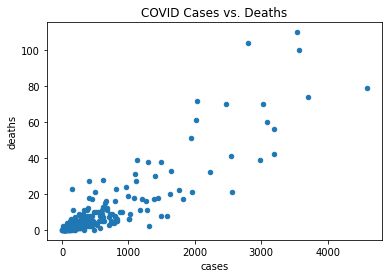

In [10]:
cases.plot(kind='scatter', x='cases', y='deaths', title= "COVID Cases vs. Deaths")

There seems to be somewhat of a moderately strong positive correlation between the two variables, cases & deaths.

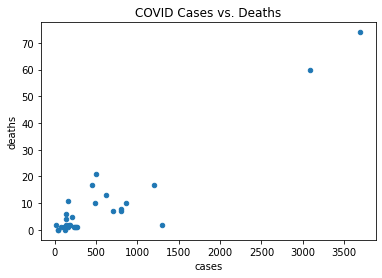

In [20]:
cases.iloc[:30].plot(kind='scatter', x='cases', y='deaths', title= "COVID Cases vs. Deaths")

The scatter plot shown here is a simplified version of the scatterplot above, showcasing the first 30 datapoints in the database.

# Analysis

To give weighting to the metric of safest neighborhood/municipality by COVID-19 case, our group decided to rank our top 5 neighborhoods/municipalities by awarding them points based on their placing on the "podium". For my dataset, Hays was awarded 5 points, Trafford awarded 4 points, Chateau awarded 3 points, Arlington Heights was awarded 2 points, and St. Clair was awarded 1 points.

The Standings are presented as stands:

Hays: 5 points

Trafford: 4 points

Chateau: 3 points

Arlington Heights: 2 points

St. Clair: 1 point

# Conclusion

Although the metric I chose was not flawless, I do believe that it was sufficient in determining a clear winner for safest neighborhood.  As mentioned earlier, the neighborhood "Hays" took the win, when in reality, the homes that did not belong to a particular neighborhood/municipality actually are the safest options if we are thinking holistically. However, my top 5 safest neighborhoods, Hays, Trafford, Chateau, Arlington Heights, and St. Clair included Arlington Heights, which has already placed on the podium for a different metric. This determined that in multiple metrics, Arlington Heights was a top contender as one of the safest neighborhoods/municipalities in the Pittsburgh area.